In [80]:
import pandas as pd
from numpy import where
from collections import Counter
from sklearn import svm
from sklearn.svm import SVC
from numpy import sqrt
from numpy import arange
from random import seed
from random import gauss
from random import random
from random import uniform
from numpy import argmax
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [4]:
df=pd.read_excel(r'C:\Users\ydong\Desktop\AI_Hackathon\Diabetes_filtered.xlsx')

In [5]:
df.shape

(3491, 78)

In [6]:
df['Diabetes ']=df['Diabetes '].fillna(0)

In [7]:
sum(df['Diabetes '])

746.0

In [8]:
df

,seqn,first,last,gender,age,race,education,marital,income,household_size,...,a1c,glucose.1,insulin,hdl,ldl_chol,grip_strength,fvc,fev1,fev1_fvc_ratio,Diabetes
0,69220,Gwendolyn,Runolfsson,1,21,7,2.0,6.0,1.0,2,...,5.0,88.0,7.27,47.0,49.0,50.3,3650.0,2846.0,0.779726,0.0
1,63030,Augustus,Farrell,0,21,1,2.0,6.0,3.0,4,...,5.2,88.0,12.01,40.0,112.0,90.1,4327.0,3629.0,0.838687,0.0
2,64051,Aaron,Schmeler,0,21,2,3.0,5.0,4.0,3,...,5.1,NaN,NaN,38.0,NaN,72.7,4471.0,3725.0,0.833147,0.0
3,65141,Bob,Bechtelar,0,21,1,2.0,5.0,4.0,4,...,5.1,95.0,3.60,55.0,73.0,86.6,5161.0,4301.0,0.833366,0.0
4,64632,Hayden,Brekke,0,21,2,3.0,5.0,10.0,2,...,6.0,95.0,14.58,39.0,55.0,94.4,6250.0,5168.0,0.826880,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3486,62217,Torie,Swift,1,77,1,1.0,5.0,4.0,3,...,7.0,178.0,14.04,46.0,106.0,33.1,1744.0,1288.0,0.738532,1.0
3487,63031,Aiko,Gleichner,1,77,4,1.0,2.0,6.0,2,...,NaN,NaN,NaN,NaN,NaN,53.1,1786.0,1249.0,0.699328,0.0
3488,65395,Federico,Carter,0,77,7,5.0,5.0,2.0,1,...,6.5,134.0,19.13,45.0,92.0,65.2,3097.0,2249.0,0.726187,1.0
3489,67412,Joseph,Hamill,0,77,3,4.0,1.0,4.0,2,...,6.3,NaN,NaN,38.0,NaN,NaN,NaN,NaN,NaN,1.0


In [9]:
df.columns

Index(['seqn', 'first', 'last', 'gender', 'age', 'race', 'education',
       'marital', 'income', 'household_size', 'insurance', 'private_insur',
       'medicare', 'medicaid', 'military_insur', 'no_insurance', 'gen_health',
       'fam_savings', 'asthma', 'memory', 'chf', 'cad', 'mi', 'cva', 'copd',
       'cancer', 'diabetes', 'depression', 'hypertension', 'smoker',
       'days_active', 'drinks_day', 'weight_kg', 'height_cm', 'bmi',
       'waist_cm', 'pulse', 'sys_bp', 'dia_bp', 'drugs', 'alb_cr_ratio', 'alb',
       'alt', 'ast', 'alk_phos', 'bun', 'ca', 'cpk', 't_chol', 'bicarb', 'cr',
       'glucose', 'iron', 'ldh', 'phos', 't_bilirubin', 't_protein', 'u_acid',
       'sodium', 'potassium', 'chloride', 'glob', 'trigs', 'wbc', 'hgb', 'hct',
       'platelets', 's_cotinine', 'a1c', 'glucose.1', 'insulin', 'hdl',
       'ldl_chol', 'grip_strength', 'fvc', 'fev1', 'fev1_fvc_ratio',
       'Diabetes '],
      dtype='object')

In [10]:
#select only needed columns
# According to our research results,below parameters most relevant to diabetes
df_filtered=df[['gender','race','age','weight_kg','height_cm','bmi','waist_cm','t_chol','glucose','Diabetes ']]

In [11]:
#delete rows with null column
df_filtered.dropna(inplace=True)

C:\Users\ydong\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df_filtered.shape

(2950, 10)

In [13]:
df_filtered['Diabetes ']=df_filtered['Diabetes '].astype(int)

C:\Users\ydong\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


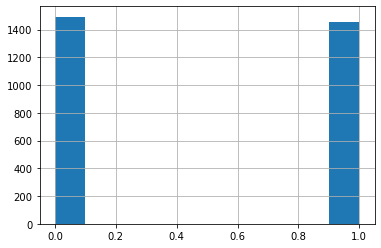

In [14]:
#gender (check if it is evenly distributed - 2020 Gender ratio in the United States: 97:100)
#gender is fair representation of the true population
hist = df_filtered['gender'].hist()

In [119]:
df_filtered['gender'].value_counts()

0    1493
1    1457
Name: gender, dtype: int64

In [15]:
#US 2020 Race breakdown - white 60% /hispanic and latino 18.5% /African American 12.2% / Asian 5.6%
#race is fair representation of the true population
df_race=df_filtered['race'].value_counts()

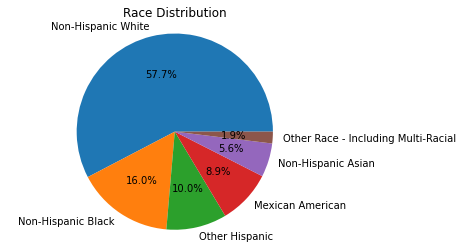

In [16]:
df_race = pd.DataFrame(df_race,columns=['race'])
my_labels = 'Non-Hispanic White','Non-Hispanic Black','Other Hispanic','Mexican American','Non-Hispanic Asian','Other Race - Including Multi-Racial'
plt.pie(df_race['race'],labels=my_labels,autopct='%1.1f%%')
plt.title('Race Distribution')
plt.axis('equal')
plt.show()

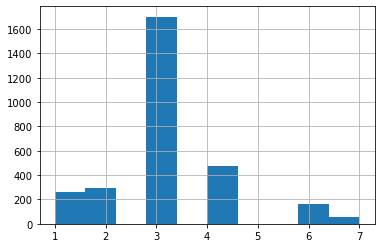

In [17]:
#race (check if it is evenly distributed)
hist = df_filtered['race'].hist()

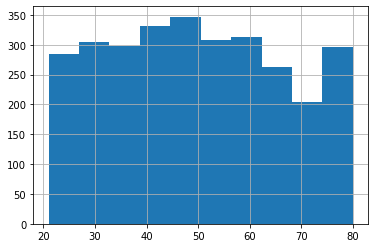

In [18]:
#age (check if it is evenly distributed)
#age is fair representation of the true population according to 2019 US census
hist = df_filtered['age'].hist()

## The target variable distribution is inbalanced (655 has been identifed as 'diabetes'.2295 as 'no diabetes'). Therefore, we used SMOTE oversampling of the minority class and undersampling our majority class. We perform SMOTE only on training data sets to make our model balanced. 

In [19]:
df_filtered['Diabetes '].value_counts()

0    2295
1     655
Name: Diabetes , dtype: int64

<AxesSubplot:>

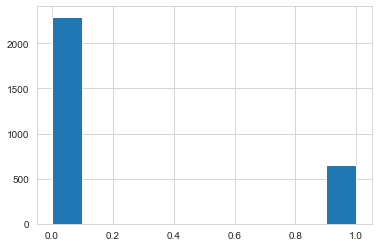

In [86]:
df_filtered['Diabetes '].hist()

In [50]:
# Spliting the data into train and test sets
X = df_filtered[['gender','race','age','weight_kg','height_cm','bmi','waist_cm','t_chol','glucose']]

y = df_filtered['Diabetes ']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [53]:
# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.82)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [54]:
y_train.value_counts()

0    1687
1    1384
Name: Diabetes , dtype: int64

## Train data is more balanced

<AxesSubplot:>

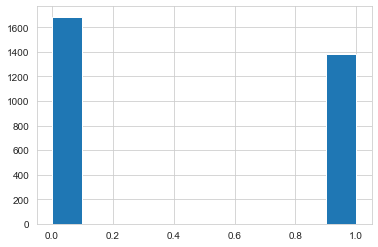

In [85]:
y_train.hist()

# Models Comparison 

## Logestic Regresson

In [55]:
X_train

,gender,race,age,weight_kg,height_cm,bmi,waist_cm,t_chol,glucose
0,0,3,49,88.300000,172.600000,29.600000,108.400000,186.000000,102.000000
1,1,2,66,47.700000,150.100000,21.200000,75.300000,198.000000,93.000000
2,1,3,49,53.100000,159.100000,21.000000,76.700000,222.000000,79.000000
3,0,3,59,75.800000,184.800000,22.200000,87.800000,166.000000,75.000000
4,1,2,64,61.000000,159.400000,24.000000,93.000000,195.000000,88.000000
...,...,...,...,...,...,...,...,...,...
3066,1,3,41,98.088608,157.898349,39.290301,127.682253,187.225753,188.419315
3067,1,4,75,62.960515,158.150565,25.057122,91.559384,116.205727,281.782965
3068,0,2,52,70.024556,158.239310,28.111764,100.286741,124.374416,131.250234
3069,0,3,30,101.472589,172.537381,34.100000,107.436295,140.818527,170.818527


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\ydong\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scoring for different class weights')

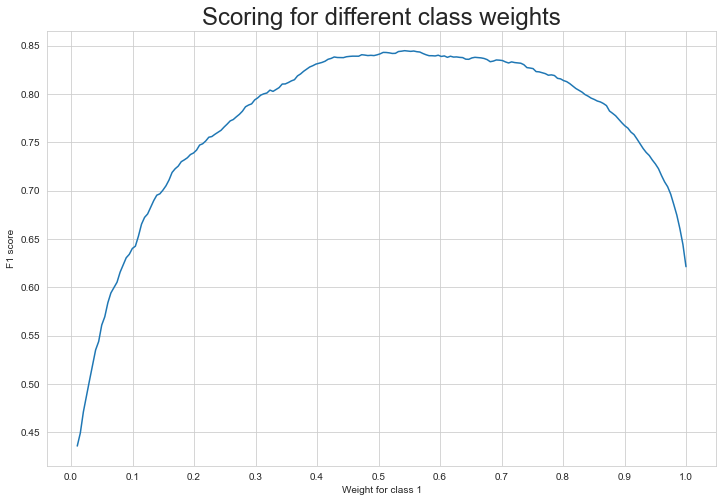

In [56]:
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [88]:
#importing and training the model
#the best parameter is around 0.5 for the class weights
lr = LogisticRegression(solver='newton-cg', class_weight={0: 0.45, 1: 0.55})
lr.fit(X_train, y_train)

# Predicting on the test data
pred_test_lr = lr.predict(X_test) 

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test_lr)
print('The f1 score for the testing data:', f1_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_lr))
print(confusion_matrix(y_test, pred_test_lr))
print(classification_report(y_test, pred_test_lr))

The f1 score for the testing data: 0.7427055702917772
Accuracy: 0.8685636856368564
[[501  64]
 [ 33 140]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       565
           1       0.69      0.81      0.74       173

    accuracy                           0.87       738
   macro avg       0.81      0.85      0.83       738
weighted avg       0.88      0.87      0.87       738



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.916


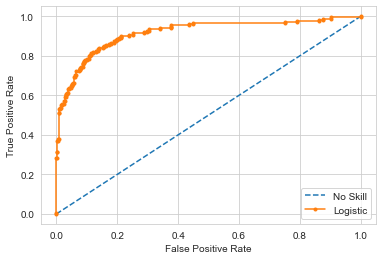

In [58]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probility = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probility)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probility)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [90]:
# apply threshold to positive probabilities to create labels
#use iterative methods and find the best threshold - 0.541
#the model result is 0.748
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_test, to_labels(lr_probility, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.541, F-Score=0.74792


# SVM

In [91]:
# Create support vector classifier - without adjust class-weight
svc = SVC(kernel='linear', C=1.0, gamma='auto',random_state=0)
# Train classifier
model = svc.fit(X_train, y_train)

In [93]:
# Predicting on the test data
pred_test_svc = model.predict(X_test) 
#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test_svc)
print('The f1 score for the testing data:', f1_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_svc))
print(confusion_matrix(y_test, pred_test_svc))
print(classification_report(y_test, pred_test_svc))

The f1 score for the testing data: 0.7527472527472528
Accuracy: 0.8780487804878049
[[511  54]
 [ 36 137]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       565
           1       0.72      0.79      0.75       173

    accuracy                           0.88       738
   macro avg       0.83      0.85      0.84       738
weighted avg       0.88      0.88      0.88       738



In [97]:
# Create support vector classifier - adjust class_weight as 'balanced' 
svc_classweight = SVC(kernel='linear', C=1.0, class_weight='balanced', gamma='auto',random_state=0)
# Train classifier
model_classweight = svc_classweight.fit(X_train, y_train)

In [98]:
# Predicting on the test data
pred_test_svc = model_classweight.predict(X_test) 
#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test_svc)
print('The f1 score for the testing data:', f1_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_svc))
print(confusion_matrix(y_test, pred_test_svc))
print(classification_report(y_test, pred_test_svc))

The f1 score for the testing data: 0.7310704960835509
Accuracy: 0.8604336043360433
[[495  70]
 [ 33 140]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       565
           1       0.67      0.81      0.73       173

    accuracy                           0.86       738
   macro avg       0.80      0.84      0.82       738
weighted avg       0.87      0.86      0.86       738



Best SVM model is without classweight - f1=0.75

# Decision Tree

In [104]:
#decision tree
# Create Decision Tree classifer object - added classweight
clf_classweight = DecisionTreeClassifier(class_weight='balanced')

# Train Decision Tree Classifer
clf_classweight = clf_classweight.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_classweight.predict(X_test)

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       565
           1       0.66      0.73      0.69       173

    accuracy                           0.85       738
   macro avg       0.79      0.81      0.80       738
weighted avg       0.86      0.85      0.85       738



In [106]:
#decision tree
# Create Decision Tree classifer object - without class weight
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       565
           1       0.64      0.74      0.68       173

    accuracy                           0.84       738
   macro avg       0.78      0.81      0.79       738
weighted avg       0.85      0.84      0.84       738



Best SVM model is without classweight - f1=0.68

# Random Forest

In [70]:
#without hyperparameter tuning - added classweight
regressor = RandomForestClassifier(class_weight='balanced', random_state=0)
regressor.fit(X_train, y_train)
y_pred_random = regressor.predict(X_test)

In [109]:
#without hyperparameter tuning - added classweight
regressor_1 = RandomForestClassifier( random_state=0)
regressor_1.fit(X_train, y_train)
y_pred_random_1 = regressor_1.predict(X_test)

In [110]:
print(classification_report(y_test, y_pred_random_1))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       565
           1       0.79      0.82      0.80       173

    accuracy                           0.91       738
   macro avg       0.87      0.87      0.87       738
weighted avg       0.91      0.91      0.91       738



In [71]:
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       565
           1       0.80      0.83      0.81       173

    accuracy                           0.91       738
   macro avg       0.87      0.88      0.88       738
weighted avg       0.91      0.91      0.91       738



We found out our model performs better with class weight adjusted. Then, we fine tune our model to find the best input parameters

Random Hyperparameter Grid
To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting

In [72]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [73]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(class_weight='balanced', random_state=0)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [74]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [77]:
#refit the model using best parameter
regressor_tuned = RandomForestClassifier(class_weight='balanced',n_estimators= 400,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt',
max_depth= None,    bootstrap=True)
regressor_tuned.fit(X_train, y_train)
y_pred_random_tuned = regressor_tuned.predict(X_test)

In [78]:
print(classification_report(y_test, y_pred_random_tuned))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       565
           1       0.80      0.83      0.81       173

    accuracy                           0.91       738
   macro avg       0.87      0.88      0.88       738
weighted avg       0.91      0.91      0.91       738



Random Forest achieve highest F1 score - 0.81 (adjusted class weight)

For demonstration purpose - we labled our prediction target varible with different location 

In [111]:
#choose random forest because it returns highest f-1 score
df_pred=pd.DataFrame(y_pred_random_tuned)

In [112]:
#generate random lat/long
df_pred['lat']=0
df_pred['lon']=0

In [113]:
for i in range(0,len(df_pred)):
    df_pred['lat'][i]=uniform(30, 55)

C:\Users\ydong\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [114]:
for i in range(0,len(df_pred)):
    df_pred['lon'][i]=uniform(-150, -80)

C:\Users\ydong\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [115]:
df_pred['patient_id']=range(0,738)

In [116]:
df_pred=df_pred.rename(columns={0: "diabetes"})

In [117]:
df_pred

,diabetes,lat,lon,patient_id
0,0,40,-89,0
1,0,40,-144,1
2,1,40,-98,2
3,1,38,-107,3
4,0,54,-102,4
...,...,...,...,...
733,0,47,-109,733
734,0,38,-82,734
735,0,37,-144,735
736,0,44,-110,736


In [118]:
# import the library and its Marker clusterization service
import folium
from folium.plugins import MarkerCluster
# Create a map object and center it to the avarage coordinates to m
m = folium.Map(location=df_pred[["lat", "lon"]].mean().to_list(), zoom_start=2)
# if the points are too close to each other, cluster them, create a cluster overlay with MarkerCluster, add to m
marker_cluster = MarkerCluster().add_to(m)
# draw the markers and assign popup and hover texts
# add the markers the the cluster layers so that they are automatically clustered
for i,r in df_pred.iterrows():
    location = (r["lat"], r["lon"])
    folium.Marker(location=location,
                      popup = df_pred['patient_id'],
                      tooltip=df_pred['patient_id'])\
    .add_to(marker_cluster)
# display the map
m